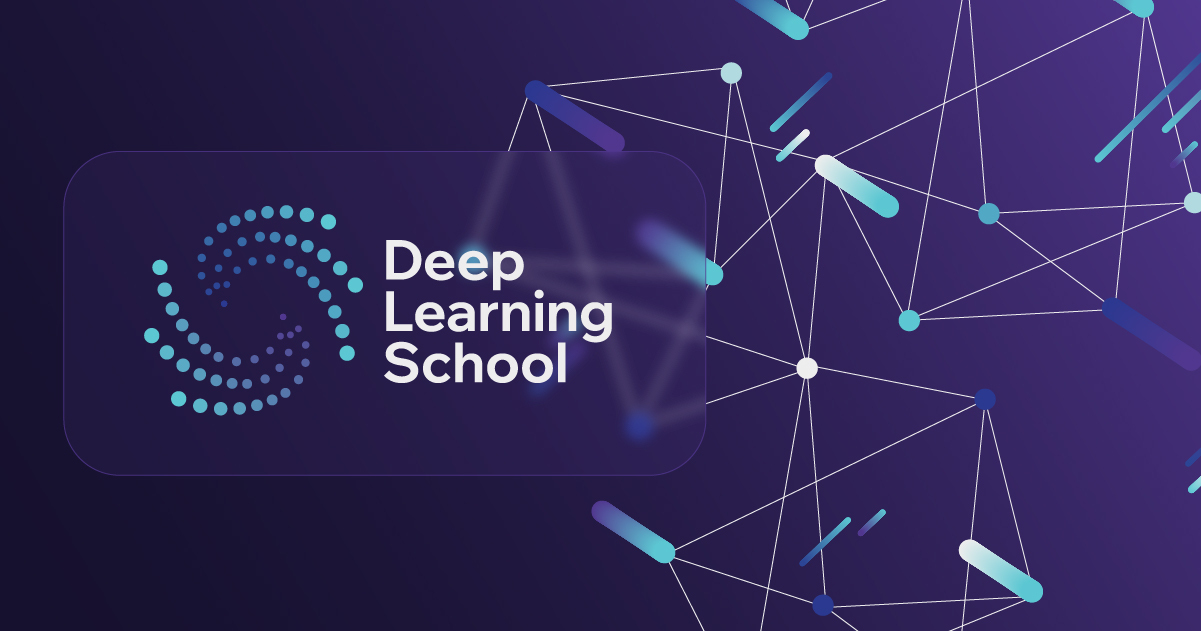

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

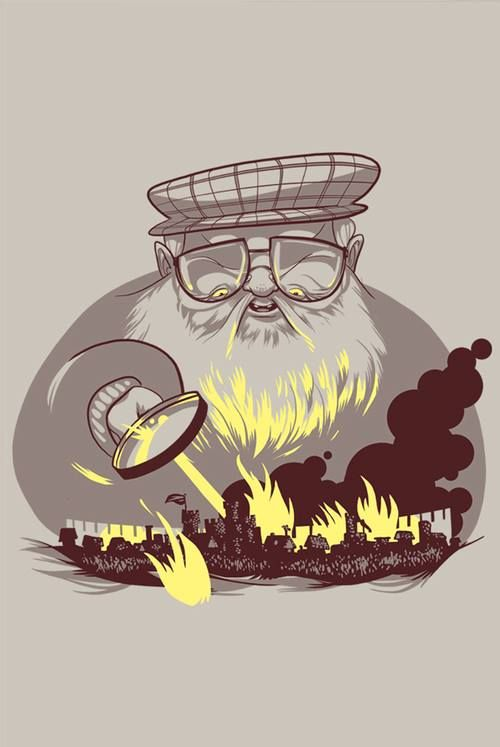

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.75$ --- 5 баллов

2) $0.75 > score \geqslant 0.65$ --- 4 балла

3) $0.65 > score \geqslant 0.55$ --- 3 балла

4) $0.55 > score \geqslant 0.50$ --- 2 балла

5) $0.50 > score \geqslant 0.45$ --- 1 балл

6) $0.45 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 42.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 11.7MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np


**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [105]:
data = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')
test = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')
pd.set_option('display.max_columns', None)

In [5]:
data.head()


,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

Заметим, что пропуски есть в следующих колонках:

Заполним на основании данных из имени персонажа и его родственников:
- title
- culture
- house

Заполним средним значением:
- age

Отнимем от сегодняшней даты возраст:
- dataOfBirth

Заполним словом Unknown:
- mother
- father
- heir
- spouse

будем считать отсутствие информации равным смерти, следовательно, заполним нулями:
- isAliveMother
- isAliveFather
- isAliveHeir
- isAliveSpouse


In [4]:
def preprocess_data(data):
    """
    Функция для предобработки данных:
    - Заполняет пропуски в столбцах isAliveMother, isAliveFather, isAliveHeir, isAliveSpouse.
    - Заполняет пропуски в столбцах mother, father, heir, spouse.
    - Заполняет пропуски в столбце age медианой.
    - Заполняет пропуски в столбце dateOfBirth на основе возраста.
    - Заполняет пропуски в столбцах culture, title, house через родственников или модой.
    - Удаляет вспомогательные столбцы.
    """

    # Заполнение пропусков в isAlive*
    for col in ['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']:
        data[col] = data[col].fillna(0)

    # Заполнение пропусков в mother, father, heir, spouse
    for col in ['mother', 'father', 'heir', 'spouse']:
        data[col] = data[col].fillna('Unknown')

    # Заполнение пропусков в age медианой
    data['age'] = data['age'].fillna(data['age'].median())

    # Заполнение пропусков в dateOfBirth
    data['dateOfBirth'] = data['dateOfBirth'].fillna(305 - data['age'])

    # Замена всех вариантов пропусков на NaN
    for col in ['culture', 'title', 'house']:
        data[col] = data[col].replace([None, 'unknown', ''], np.nan)

    # Создание словарей для быстрого поиска
    name_to_culture = data.dropna(subset=['culture']).set_index('name')['culture'].to_dict()
    name_to_title = data.dropna(subset=['title']).set_index('name')['title'].to_dict()
    name_to_house = data.dropna(subset=['house']).set_index('name')['house'].to_dict()

    # Функция для поиска культуры через родственников
    def get_culture_from_relatives(row):
        for relative in ['father', 'mother', 'heir', 'spouse']:
            relative_name = row[relative]
            if relative_name != 'unknown' and relative_name in name_to_culture:
                return name_to_culture[relative_name]
        return np.nan

    # Функция для поиска титула через родственников
    def get_title_from_relatives(row):
        for relative in ['father', 'mother', 'heir', 'spouse']:
            relative_name = row[relative]
            if relative_name != 'unknown' and relative_name in name_to_title:
                return name_to_title[relative_name]
        return np.nan

    # Функция для поиска дома через родственников
    def get_house_from_relatives(row):
        for relative in ['father', 'mother', 'heir', 'spouse']:
            relative_name = row[relative]
            if relative_name != 'unknown' and relative_name in name_to_house:
                return name_to_house[relative_name]
        if pd.notna(row['name']):
            cleaned_name = str(row['name']).strip()
            parts = cleaned_name.split()
            return 'House ' + parts[-1] if parts else np.nan
        return np.nan

    # Создание вспомогательных столбцов
    data['culture_from_relatives'] = data.apply(get_culture_from_relatives, axis=1)
    data['title_from_relatives'] = data.apply(get_title_from_relatives, axis=1)
    data['house_from_relatives'] = data.apply(get_house_from_relatives, axis=1)

    # Заполнение пропусков в culture, title, house
    data['culture'] = data['culture'].fillna(data['culture_from_relatives']).fillna(data['culture'].mode()[0])
    data['title'] = data['title'].fillna(data['title_from_relatives']).fillna(data['title'].mode()[0])
    data['house'] = data['house'].fillna(data['house_from_relatives']).fillna(data['house'].mode()[0])

    # Удаление вспомогательных столбцов
    data = data.drop(columns=['culture_from_relatives', 'title_from_relatives', 'house_from_relatives'])

    return data



In [5]:
data = preprocess_data(data)

In [6]:
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Ser,1,Northmen,281.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,House Targaryen,Unknown,0,0,0,0,0,1.0,0.0,0.0,0.0,0,0,24.0,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,Unknown,Unknown,Unknown,House Frey,Perra Royce,1,1,1,1,1,0.0,0.0,0.0,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,Northmen,281.0,Unknown,Unknown,Unknown,House Swyft,Unknown,0,0,0,1,0,0.0,0.0,0.0,0.0,0,1,24.0,0,0.267559,1
4,Aemma Arryn,Queen,0,Northmen,82.0,Unknown,Unknown,Unknown,House Arryn,Viserys I Targaryen,0,0,0,0,0,0.0,0.0,0.0,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,Unknown,Unknown,Unknown,House Santagar,Eldon Estermont,0,0,0,1,0,0.0,0.0,0.0,1.0,1,1,29.0,0,0.043478,1


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             1557 non-null   object 
 2   male              1557 non-null   int64  
 3   culture           1557 non-null   object 
 4   dateOfBirth       1557 non-null   float64
 5   mother            1557 non-null   object 
 6   father            1557 non-null   object 
 7   heir              1557 non-null   object 
 8   house             1557 non-null   object 
 9   spouse            1557 non-null   object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     1557 non-null   float64
 16  isAliveFather     1557 non-null   float64
 17  

**Все пропуски обработаны!**



**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


<Axes: xlabel='popularity', ylabel='Count'>

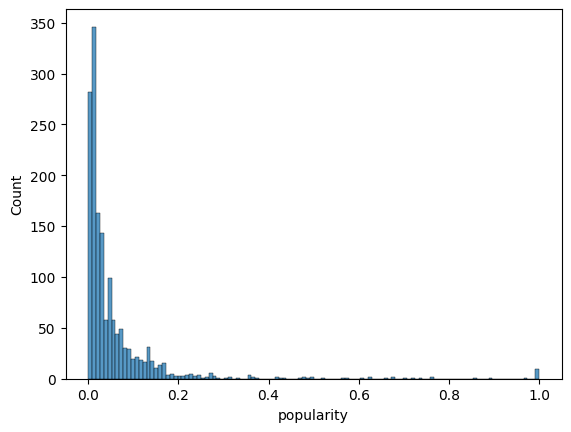

In [81]:
sns.histplot(data=data, x="popularity")


Его мы и поставим как пороговое

In [9]:
data['isPopular'] = data['popularity'].apply(lambda x: 1 if x>0.2 else 0)
data['boolDeadRelations'] = data['numDeadRelations'].apply(lambda x: 1 if x>0 else 0)

# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],

}

cult_reverse = {value: key for key, values in cult.items() for value in values}
data['culture'] = data['culture'].apply(lambda x: cult_reverse.get(x.lower(), x))


In [98]:
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Ser,1,Northmen,281.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,House Targaryen,Unknown,0,0,0,0,0,1.0,0.0,0.0,0.0,0,0,24.0,11,0.605351,0,1,1
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,Unknown,Unknown,Unknown,House Frey,Perra Royce,1,1,1,1,1,0.0,0.0,0.0,1.0,1,1,97.0,1,0.896321,1,1,1
3,Addison Hill,Ser,1,Northmen,281.0,Unknown,Unknown,Unknown,House Swyft,Unknown,0,0,0,1,0,0.0,0.0,0.0,0.0,0,1,24.0,0,0.267559,1,1,0
4,Aemma Arryn,Queen,0,Northmen,82.0,Unknown,Unknown,Unknown,House Arryn,Viserys I Targaryen,0,0,0,0,0,0.0,0.0,0.0,0.0,1,1,23.0,0,0.183946,0,0,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,Unknown,Unknown,Unknown,House Santagar,Eldon Estermont,0,0,0,1,0,0.0,0.0,0.0,1.0,1,1,29.0,0,0.043478,1,0,0


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

Столбцы 'name', 'mother', 'father', 'heir', 'spouse' не являются существенными, т.к. всю возможную информацию мы из них получили



In [10]:
data.drop(columns=['name', 'mother', 'father', 'heir', 'spouse'], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [11]:
data['isAlive'].value_counts()

,count
isAlive,
1,1212
0,345


Целевая переменная категориальная.
Заметим, что датасет несбалансированный, мы должны это учесть при обучении.

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [12]:
cat_columns = ['title', 'culture', 'house']

from sklearn.preprocessing import OneHotEncoder

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(data[cat_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(cat_columns), index=data.index)



In [13]:
one_hot_df.head()

,title_Archmaester,title_Ashford,title_Banefort,title_Big BucketThe Wull,title_Bitterbridge,title_Blackcrown,title_Blackmont,title_Bloodrider,title_Blue Grace,title_Brightwater,title_Broad Arch,title_Brother,title_BrotherProctor,title_Captain,title_Captain of the guard,title_Castellan,title_CastellanCommander,title_Casterly Rock,title_Castle Lychester,title_Cerwyn,title_Chief Undergaoler,title_Claw Isle,title_Cobblecat,title_Coldmoat,title_Coldwater Burn,title_Commander of the Second Sons,title_Crag,title_Crakehall,title_Cupbearer,title_Deepwood Motte,title_Dragonstone,title_Duskendale,title_Dyre Den,title_Eastwatch-by-the-Sea,title_Eyrie,title_Fair Isle,title_Feastfires,title_Felwood,title_First Ranger,title_First Sword of Braavos,title_Foamdrinker,title_Ghost Hill,title_Godsgrace,title_Golden Tooth,title_Goldengrove,title_Goldgrass,title_Good Master,title_Goodman,title_Goodwife,title_Grand Maester,title_Grassy Vale,title_Greenshield,title_Greenstone,title_Grey Glen,title_Gulltown,title_Hand of the King,title_Harrenhal,title_Harridan Hill,title_Hayford,title_Heart's Home,title_High Steward of Highgarden,title_Highgarden,title_Hightower,title_Hornvale,title_Hornwood,title_Ironoaks,title_Karhold,title_Karl's Hold,title_Kayce,title_Khal,title_KhalKo (formerly),title_Khalakka,title_King,title_King in the North,title_King of Astapor,title_King of the Andals,title_King of the Iron Islands,title_King-Beyond-the-Wall,title_Knight,title_Knight of Griffin's Roost,title_Lady,title_Lady Marya,title_Lady of Darry,title_Lady of Torrhen's Square,title_LadyQueen,title_LadyQueenDowager Queen,title_Last Hearth,title_Light of the West,title_Longbow Hall,title_Longsister,title_Lord,title_Lord Commander of the Night's Watch,title_Lord Paramount of the Mander,title_Lord Paramount of the Trident,title_Lord Reaper of Pyke,title_Lord Seneschal,title_Lord Steward of the Iron Islands,title_Lord of Atranta,title_Lord of Coldmoat,title_Lord of Crows Nest,title_Lord of Darry,title_Lord of Dragonstone,title_Lord of Flint's Finger,title_Lord of Greyshield,title_Lord of Harrenhal,title_Lord of Hellholt,title_Lord of Honeyholt,title_Lord of Iron Holt,title_Lord of Kingsgrave,title_Lord of Oldcastle,title_Lord of Pebbleton,title_Lord of Southshield,title_Lord of Starfall,title_Lord of Sunflower Hall,title_Lord of the Crossing,title_Lord of the Deep Den,title_Lord of the Iron Islands,title_Lord of the Marches,title_Lord of the Red Dunes,title_Lord of the Snakewood,title_Lord of the Ten TowersLord Harlaw of HarlawHarlaw of Harlaw,title_Lord of the Tides,title_Lord of the Tor,title_Lordsport,title_Maester,title_Magister of Pentos,title_Maidenpool,title_Master of Coin,title_Master of Deepwood Motte,title_Master of Harlaw Hall,title_Master of coin,title_Master-at-Arms,title_Mistress of whisperers,title_Nightsong,title_Oarmaster,title_Pinkmaiden,title_Prince,title_Prince of Dorne,title_Prince of Dragonstone,title_Prince of Winterfell,title_Princess,title_PrincessQueen,title_PrincessSepta,title_Protector of the Realm,title_Queen,title_QueenBlack Bride,title_Rain House,title_Red Flower Vale,title_Red Priest,title_Redfort,title_Rills,title_Riverrun,title_Rook's Rest,title_Runestone,title_Salt Shore,title_Sandstone,title_Seagard,title_Sealord,title_Sealskin Point,title_Seneschal,title_Septa,title_Septon,title_Ser,title_Serthe Knight of Saltpans,title_Seven Kingdoms,title_Sharp Point,title_Shatterstone,title_Skyreach,title_Starpike,title_Steward,title_Stokeworth,title_Stonehelm,title_Strongsong,title_Sweetport Sound,title_Sweetsister,title_Ten Towers,title_The LiddleLord Liddle,title_Three Sisters,title_Three Towers,title_Tower of Glimmering,title_Tradesman-Captain,title_Undergaoler,title_Uplands,title_Volmark,title_Whitewalls,title_Widow's Watch,title_Wind Witch,title_Winterfell,title_Wisdom,title_Wraith,title_Wyndhall,title_Yronwood,title_master of ships,title_red hand,culture_Astapori,culture_Braavosi,culture_Crannogmen,culture_Dornish,culture_Dothraki,culture_Free Fo

In [14]:
df_encoded = pd.concat([data, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(cat_columns, axis=1)

# Display the resulting dataframe
df_encoded

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations,title_Archmaester,title_Ashford,title_Banefort,title_Big BucketThe Wull,title_Bitterbridge,title_Blackcrown,title_Blackmont,title_Bloodrider,title_Blue Grace,title_Brightwater,title_Broad Arch,title_Brother,title_BrotherProctor,title_Captain,title_Captain of the guard,title_Castellan,title_CastellanCommander,title_Casterly Rock,title_Castle Lychester,title_Cerwyn,title_Chief Undergaoler,title_Claw Isle,title_Cobblecat,title_Coldmoat,title_Coldwater Burn,title_Commander of the Second Sons,title_Crag,title_Crakehall,title_Cupbearer,title_Deepwood Motte,title_Dragonstone,title_Duskendale,title_Dyre Den,title_Eastwatch-by-the-Sea,title_Eyrie,title_Fair Isle,title_Feastfires,title_Felwood,title_First Ranger,title_First Sword of Braavos,title_Foamdrinker,title_Ghost Hill,title_Godsgrace,title_Golden Tooth,title_Goldengrove,title_Goldgrass,title_Good Master,title_Goodman,title_Goodwife,title_Grand Maester,title_Grassy Vale,title_Greenshield,title_Greenstone,title_Grey Glen,title_Gulltown,title_Hand of the King,title_Harrenhal,title_Harridan Hill,title_Hayford,title_Heart's Home,title_High Steward of Highgarden,title_Highgarden,title_Hightower,title_Hornvale,title_Hornwood,title_Ironoaks,title_Karhold,title_Karl's Hold,title_Kayce,title_Khal,title_KhalKo (formerly),title_Khalakka,title_King,title_King in the North,title_King of Astapor,title_King of the Andals,title_King of the Iron Islands,title_King-Beyond-the-Wall,title_Knight,title_Knight of Griffin's Roost,title_Lady,title_Lady Marya,title_Lady of Darry,title_Lady of Torrhen's Square,title_LadyQueen,title_LadyQueenDowager Queen,title_Last Hearth,title_Light of the West,title_Longbow Hall,title_Longsister,title_Lord,title_Lord Commander of the Night's Watch,title_Lord Paramount of the Mander,title_Lord Paramount of the Trident,title_Lord Reaper of Pyke,title_Lord Seneschal,title_Lord Steward of the Iron Islands,title_Lord of Atranta,title_Lord of Coldmoat,title_Lord of Crows Nest,title_Lord of Darry,title_Lord of Dragonstone,title_Lord of Flint's Finger,title_Lord of Greyshield,title_Lord of Harrenhal,title_Lord of Hellholt,title_Lord of Honeyholt,title_Lord of Iron Holt,title_Lord of Kingsgrave,title_Lord of Oldcastle,title_Lord of Pebbleton,title_Lord of Southshield,title_Lord of Starfall,title_Lord of Sunflower Hall,title_Lord of the Crossing,title_Lord of the Deep Den,title_Lord of the Iron Islands,title_Lord of the Marches,title_Lord of the Red Dunes,title_Lord of the Snakewood,title_Lord of the Ten TowersLord Harlaw of HarlawHarlaw of Harlaw,title_Lord of the Tides,title_Lord of the Tor,title_Lordsport,title_Maester,title_Magister of Pentos,title_Maidenpool,title_Master of Coin,title_Master of Deepwood Motte,title_Master of Harlaw Hall,title_Master of coin,title_Master-at-Arms,title_Mistress of whisperers,title_Nightsong,title_Oarmaster,title_Pinkmaiden,title_Prince,title_Prince of Dorne,title_Prince of Dragonstone,title_Prince of Winterfell,title_Princess,title_PrincessQueen,title_PrincessSepta,title_Protector of the Realm,title_Queen,title_QueenBlack Bride,title_Rain House,title_Red Flower Vale,title_Red Priest,title_Redfort,title_Rills,title_Riverrun,title_Rook's Rest,title_Runestone,title_Salt Shore,title_Sandstone,title_Seagard,title_Sealord,title_Sealskin Point,title_Seneschal,title_Septa,title_Septon,title_Ser,title_Serthe Knight of Saltpans,title_Seven Kingdoms,title_Sharp Point,title_Shatterstone,title_Skyreach,title_Starpike,title_Steward,title_Stokeworth,title_Stonehelm,title_Strongsong,title_Sweetport Sound,title_Sweetsister,title_Ten Towers,title_The LiddleLord Liddle,title_Three Sisters,title_Three Towers,title_Tower of Glimmering,title_Tradesman-Captain,title_Undergaoler,title_Uplands,title_Volmark,title_Whitewalls,title_Widow's Watch,title_Wind Witch,title_Winterfell,title_W

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1557 non-null   object 
 1   male               1557 non-null   int64  
 2   culture            1557 non-null   object 
 3   dateOfBirth        1557 non-null   float64
 4   house              1557 non-null   object 
 5   book1              1557 non-null   int64  
 6   book2              1557 non-null   int64  
 7   book3              1557 non-null   int64  
 8   book4              1557 non-null   int64  
 9   book5              1557 non-null   int64  
 10  isAliveMother      1557 non-null   float64
 11  isAliveFather      1557 non-null   float64
 12  isAliveHeir        1557 non-null   float64
 13  isAliveSpouse      1557 non-null   float64
 14  isMarried          1557 non-null   int64  
 15  isNoble            1557 non-null   int64  
 16  age                1557 non-n

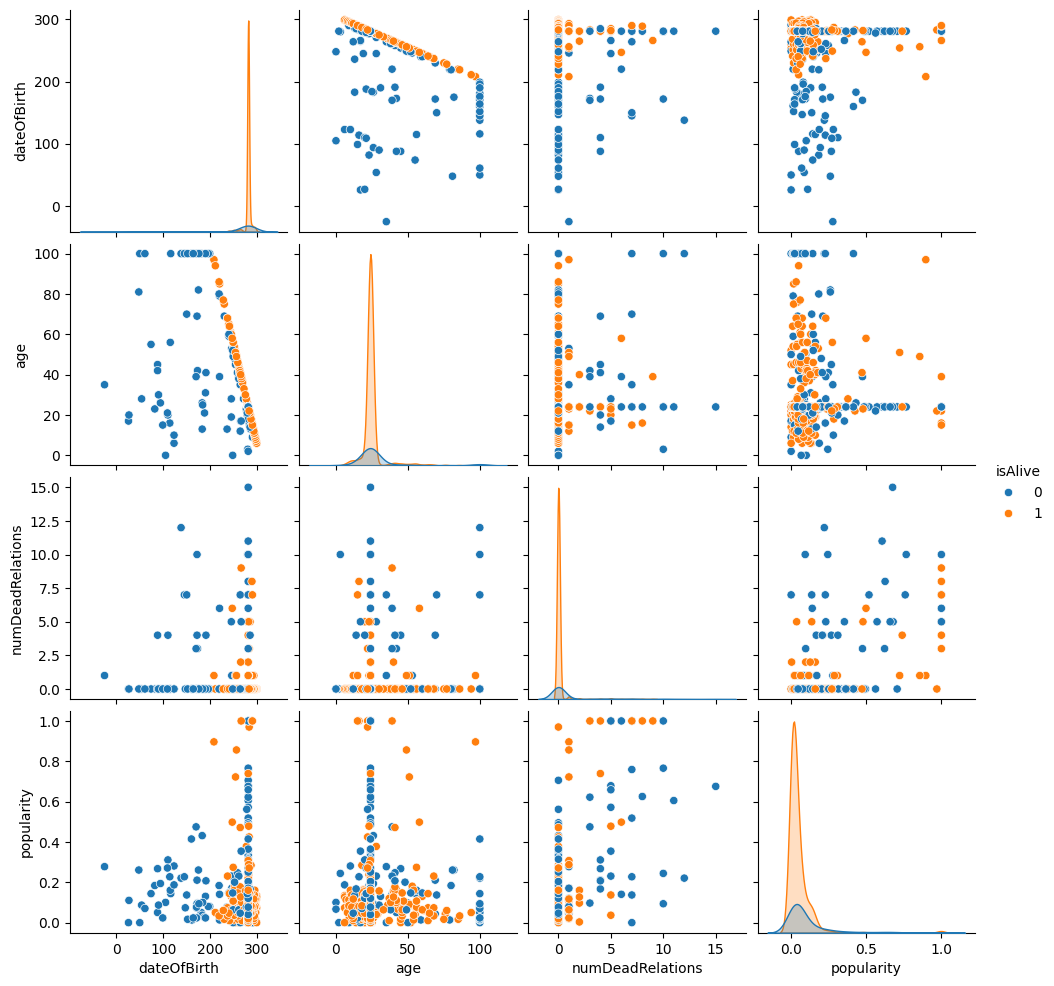

In [43]:
cut_col = ['dateOfBirth', 'age', 'numDeadRelations', 'popularity', 'isAlive']

sns.pairplot(data[cut_col], hue = 'isAlive')

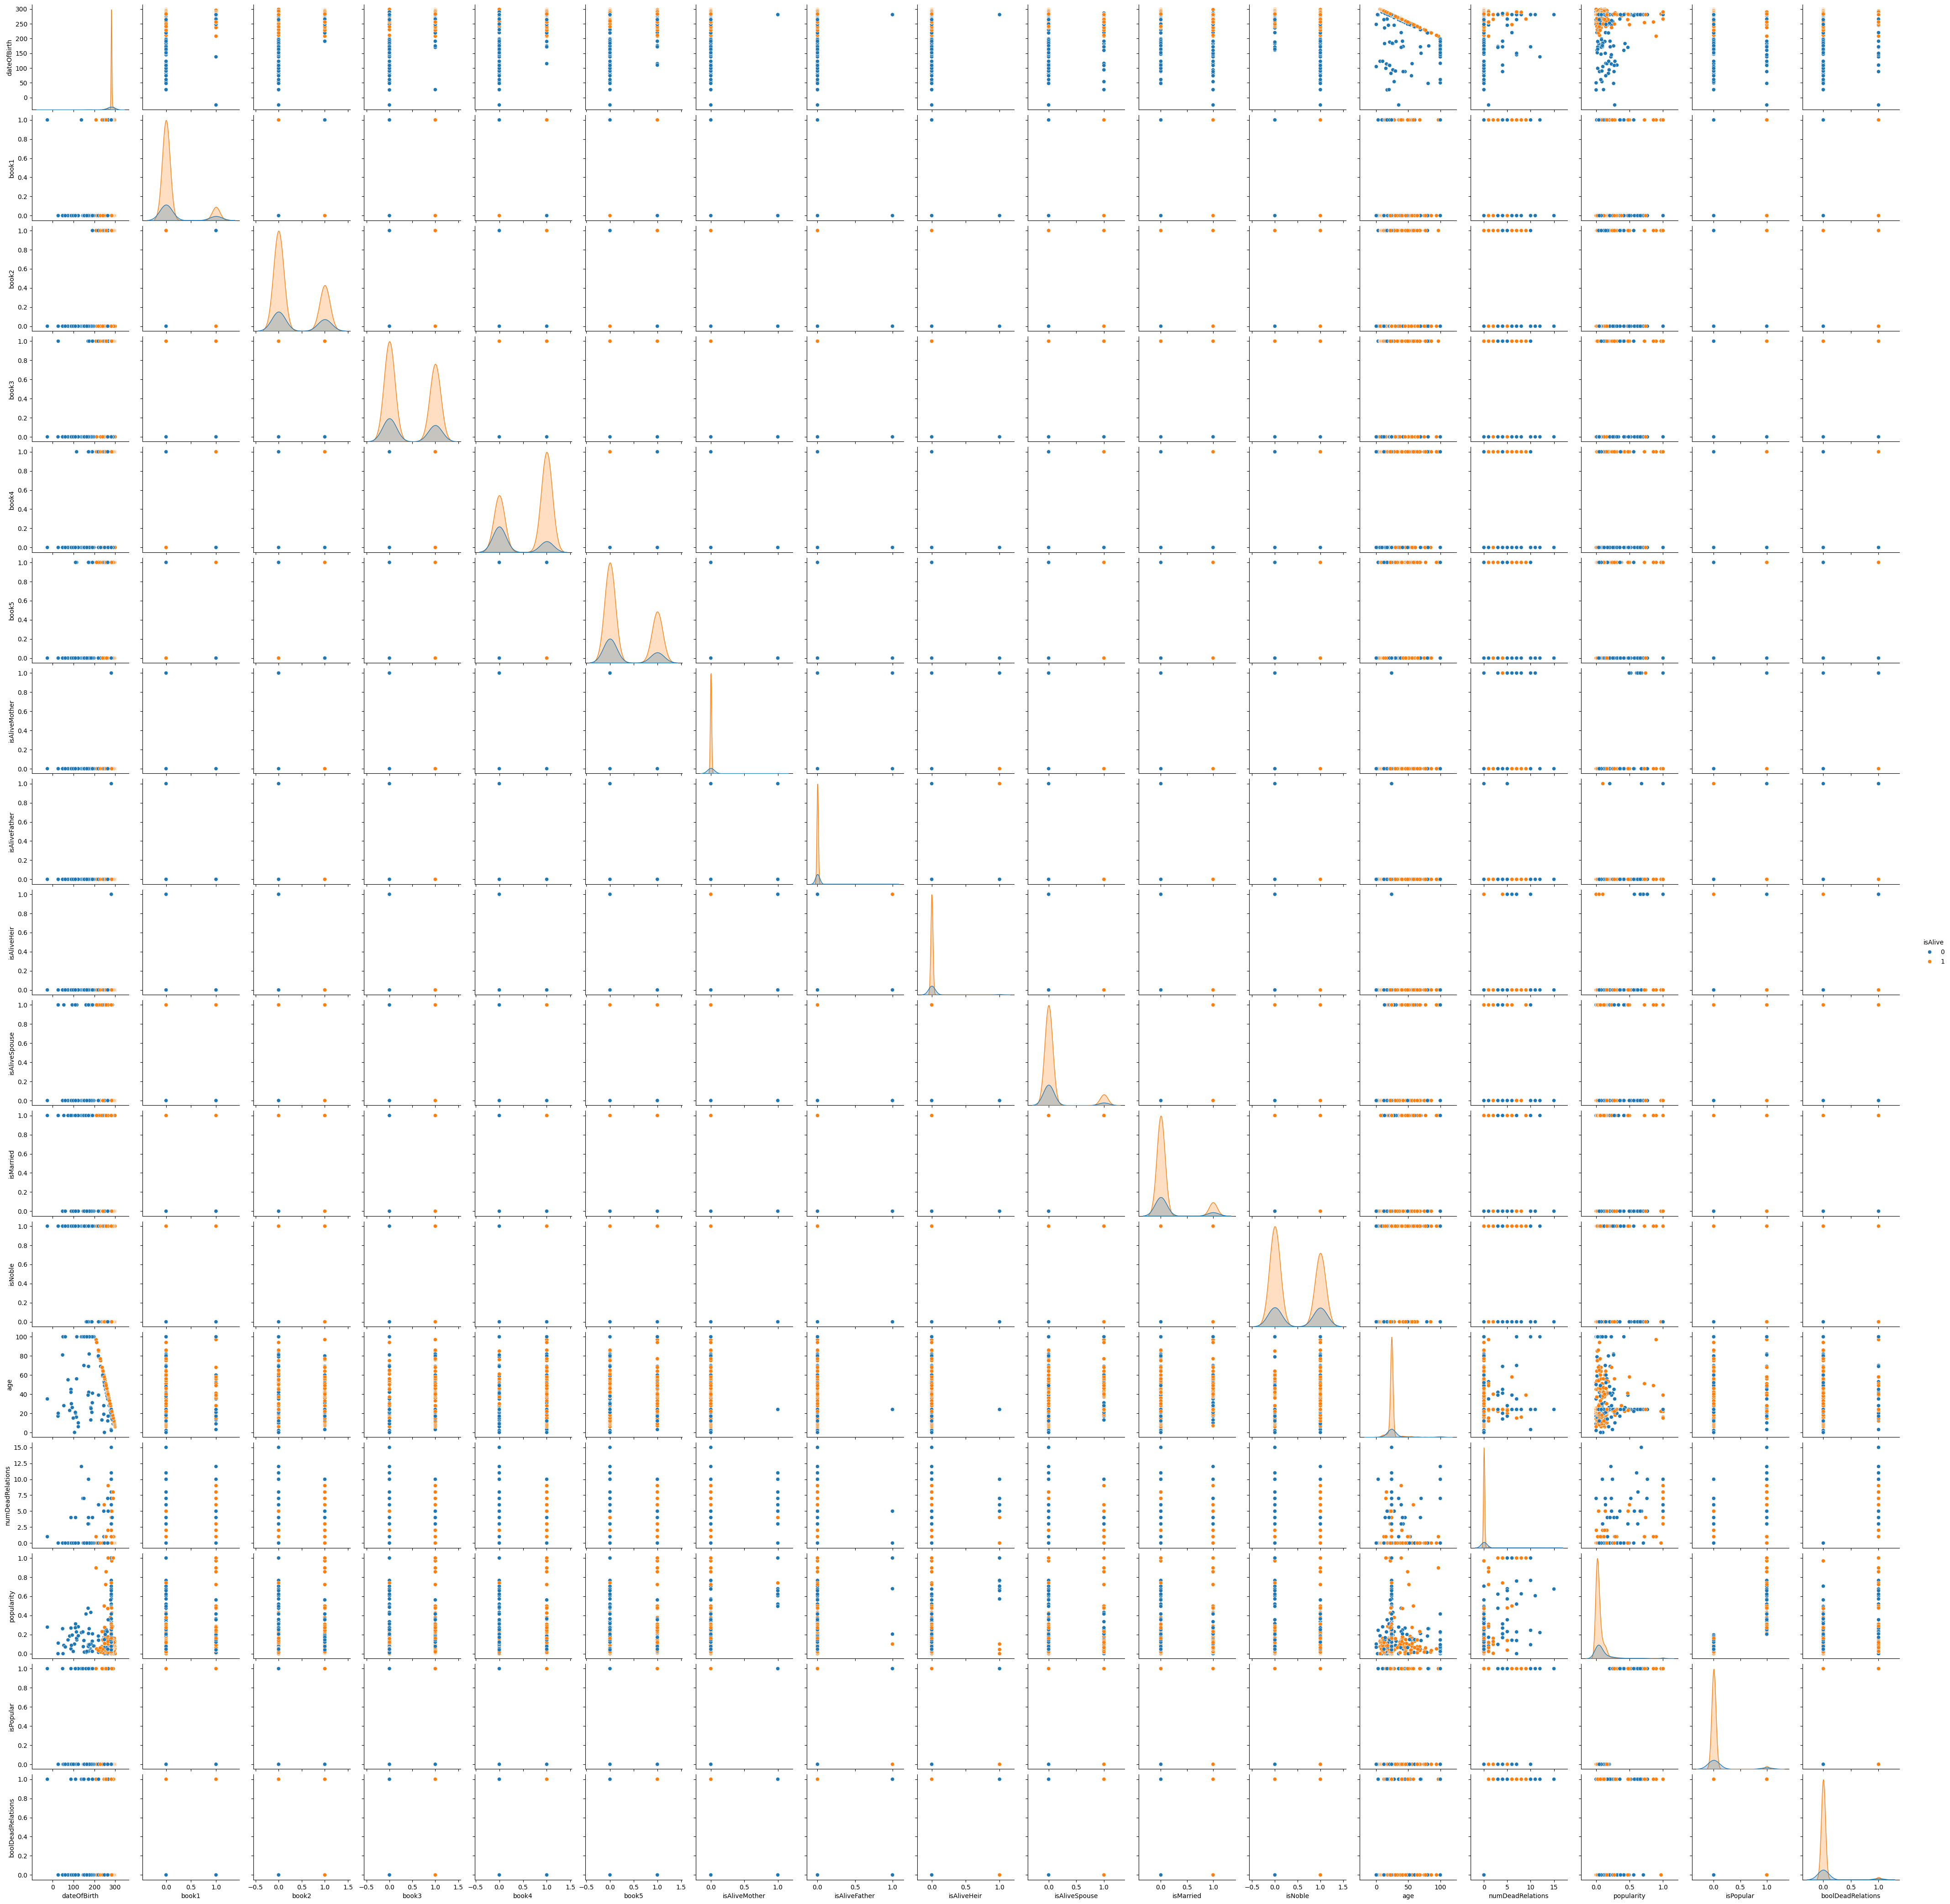

In [45]:
col_columns = ['dateOfBirth', 'book1', 'book2', 'book3', 'book4', 'book5', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isPopular', 'boolDeadRelations', 'isAlive']
sns.pairplot(data[col_columns], hue ='isAlive')


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.




In [34]:
from sklearn.ensemble import ExtraTreesClassifier
selector=ExtraTreesClassifier()
result=selector.fit(df_encoded[df_encoded.columns], df_encoded['isAlive'])
result.feature_importances_
features_table= pd.DataFrame(result.feature_importances_, index =df_encoded.columns,
                                              columns =['importance'])
features_table.sort_values(by='importance', ascending=False)

,importance
isAlive,0.603646
book4,0.031122
popularity,0.026794
dateOfBirth,0.024948
isPopular,0.015037
...,...
house_House Poetess,0.000000
title_Rills,0.000000
house_House Ocley,0.000000
house_House Jeyne,0.000000


**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [192]:
X = df_encoded[['book4', 'dateOfBirth', 'isPopular', 'culture_Valyrian', 'house_House Targaryen', "house_Night's Watch", 'male', 'book3', 'book1', 'book1', 'book5', 'book2', 'boolDeadRelations', 'isNoble', 'title_Ser', 'house_House Greyjoy', 'isMarried', 'culture_Northmen']]
y = df_encoded['isAlive']
#X = df_encoded[['book4', 'dateOfBirth', 'isPopular', 'culture_Valyrian', 'house_House Targaryen', "house_Night's Watch", 'male', 'book3', 'book1', 'book1', 'book5', 'book2', 'boolDeadRelations']]


**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [16]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [18]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [62]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [140]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression()

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [141]:
from sklearn.ensemble import RandomForestClassifier

# Шаг 1. создание модели
model_rf = RandomForestClassifier()

# Шаг 2. обучение модели
model_rf.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_rf = model_rf.predict(X_test)


In [63]:
# Шаг 1. создание модели
AdaBoostClassifier = AdaBoostClassifier()

# Шаг 2. обучение модели
AdaBoostClassifier.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_AdaBoostClassifier = AdaBoostClassifier.predict(X_test)

In [64]:
# Шаг 1. создание модели
GaussianProcessClassifier = GaussianProcessClassifier()

# Шаг 2. обучение модели
GaussianProcessClassifier.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_GaussianProcessClassifier = GaussianProcessClassifier.predict(X_test)

In [65]:
# Шаг 1. создание модели
GaussianNB = GaussianNB()

# Шаг 2. обучение модели
GaussianNB.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_GaussianNB = GaussianNB.predict(X_test)

In [66]:
# Шаг 1. создание модели
KNeighborsClassifier = KNeighborsClassifier()

# Шаг 2. обучение модели
KNeighborsClassifier.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_KNeighborsClassifier = KNeighborsClassifier.predict(X_test)

In [67]:
# Шаг 1. создание модели
SVC = SVC()

# Шаг 2. обучение модели
SVC.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_SVC = SVC.predict(X_test)

In [68]:
# Шаг 1. создание модели
DecisionTreeClassifier = DecisionTreeClassifier()

# Шаг 2. обучение модели
DecisionTreeClassifier.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_DecisionTreeClassifier = DecisionTreeClassifier.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [28]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [142]:
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8077


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [143]:
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8098


In [131]:

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_AdaBoostClassifier)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7949


In [72]:
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_GaussianProcessClassifier)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7885


In [73]:

accuracy = accuracy_score(y_test, y_pred_GaussianNB)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7842


In [74]:

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_KNeighborsClassifier)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7970


In [75]:
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_SVC)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7927


In [76]:

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_DecisionTreeClassifier )
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7842


Выберите лучшую модель.

Лучше всего себя показала модель RandomForestClassifier, подберем для неё лучшие гиперпараметры

In [193]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [194]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_depth': [i for i in range(3, 16, 2)],
    'max_features': ['log2', 'sqrt'],


}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)



{'max_depth': 11, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [116]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              389 non-null    object 
 1   male               389 non-null    int64  
 2   culture            389 non-null    object 
 3   dateOfBirth        389 non-null    float64
 4   house              389 non-null    object 
 5   book1              389 non-null    int64  
 6   book2              389 non-null    int64  
 7   book3              389 non-null    int64  
 8   book4              389 non-null    int64  
 9   book5              389 non-null    int64  
 10  isAliveMother      389 non-null    float64
 11  isAliveFather      389 non-null    float64
 12  isAliveHeir        389 non-null    float64
 13  isAliveSpouse      389 non-null    float64
 14  isMarried          389 non-null    int64  
 15  isNoble            389 non-null    int64  
 16  age                389 non-

In [107]:
test = preprocess_data(test)

In [109]:
test['isPopular'] = test['popularity'].apply(lambda x: 1 if x>0.2 else 0)
test['boolDeadRelations'] = test['numDeadRelations'].apply(lambda x: 1 if x>0 else 0)

# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],

}

cult_reverse = {value: key for key, values in cult.items() for value in values}
test['culture'] = test['culture'].apply(lambda x: cult_reverse.get(x.lower(), x))


In [111]:
test.drop(columns=['name', 'mother', 'father', 'heir', 'spouse'], inplace = True)

In [113]:
cat_columns = ['title', 'culture', 'house']

from sklearn.preprocessing import OneHotEncoder

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(test[cat_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_test = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(cat_columns), index=test.index)



In [115]:
test_encoded = pd.concat([test, one_hot_test], axis=1)

# Drop the original categorical columns
test_encoded = test_encoded.drop(cat_columns, axis=1)

In [195]:
X_train = df_encoded[['book4', 'dateOfBirth', 'isPopular', 'culture_Valyrian', 'house_House Targaryen', "house_Night's Watch", 'male', 'book3', 'book1', 'book1', 'book5', 'book2', 'boolDeadRelations', 'isNoble', 'title_Ser', 'house_House Greyjoy', 'isMarried', 'culture_Northmen']]
y_train = df_encoded['isAlive']
X_test = test_encoded[['book4', 'dateOfBirth', 'isPopular', 'culture_Valyrian', 'house_House Targaryen', "house_Night's Watch", 'male', 'book3', 'book1', 'book1', 'book5', 'book2', 'boolDeadRelations', 'isNoble', 'title_Ser', 'house_House Greyjoy', 'isMarried', 'culture_Northmen']]


In [196]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [201]:
from sklearn.ensemble import RandomForestClassifier

# Шаг 1. создание модели
model_rf = RandomForestClassifier(class_weight='balanced', n_estimators = 100, random_state=42, max_depth = 11, min_samples_leaf = 1, min_samples_split = 2, max_features = 'log2',)
# Шаг 2. обучение модели
model_rf.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = model_rf.predict(X_test)


### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [99]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.44MB/s]


In [202]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [161]:
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,0


In [203]:
submission['isAlive'] = y_pred

Как сохранить измененный Pandas DataFrame в csv файл:

In [204]:
submission.to_csv("/content/new_submission.csv", index=False)